In [1]:
%matplotlib widget

import inspect
import re
def debugPrint(x):
    frame = inspect.currentframe().f_back
    s = inspect.getframeinfo(frame).code_context[0]
    r = re.search(r"\((.*)\)", s).group(1)
    print("{} [{}] = {}".format(r,type(x).__name__, x))
import h5py
import os
import torch
os.environ['TORCH_CUDA_ARCH_LIST'] = f'{torch.cuda.get_device_properties(0).major}.{torch.cuda.get_device_properties(0).minor}'
import numpy as np
from tqdm.autonotebook import tqdm
import os
from BasisConvolution.util.dataloader import datasetLoader, processFolder#, DataLoader
from BasisConvolution.util.hyperparameters import defaultHyperParameters
from BasisConvolution.util.dataPlotting import getFileCount, getPreparePlotFunction, getUpdatePlotFunction
import matplotlib.pyplot as plt
import ipywidgets as widgets

/tmp/ipykernel_1307934/3069418549.py:15: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
import ipympl
print(ipympl.__version__)

0.9.7


In [3]:
hyperParameterDict = defaultHyperParameters()

hyperParameterDict['batch_size'] = 1
hyperParameterDict['maxRollOut'] = 0
hyperParameterDict['maxUnroll'] = 0

hyperParameterDict['device'] = 'cuda' if torch.cuda.is_available() else 'cpu'
hyperParameterDict['device'] = 'cpu'

hyperParameterDict['augmentAngle'] = False
hyperParameterDict['augmentJitter'] = False
hyperParameterDict['zeroOffset'] = False

In [4]:

datasetPath = '/home/winchenbach/dev/SFBC/datasets/periodicDS/'
train_ds = datasetLoader(processFolder(hyperParameterDict, datasetPath))
print(train_ds[0][2])
print(train_ds[0][2]['samples'][0])
print(train_ds[0][2]['samples'][-1])


{'fileName': '/home/winchenbach/dev/SFBC/datasets/periodicDS//generativePeriodic - 2023-12-11_16-33-38.hdf5', 'frames': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,

In [5]:
f = h5py.File(train_ds[0][2]['fileName'], 'r')

In [6]:
len(f['simulationExport'].keys()) - 1

1023

In [7]:
getFileCount(train_ds[0][2]['fileName'])

1022

Unroll length  8  exceeds maximum, limiting to 0


/home/winchenbach/dev/SFBC_tum_pbs/src/BasisConvolution/util/testcases.py:132: UserWarning: Unroll length is zero, but frame distance is not zero
  warnings.warn('Unroll length is zero, but frame distance is not zero')


Dropdown(description='File:', layout=Layout(width='initial'), options=('../datasets/SFBC_dataset_I/dataset/out…

IntSlider(value=0, description='Slider:', max=2047)

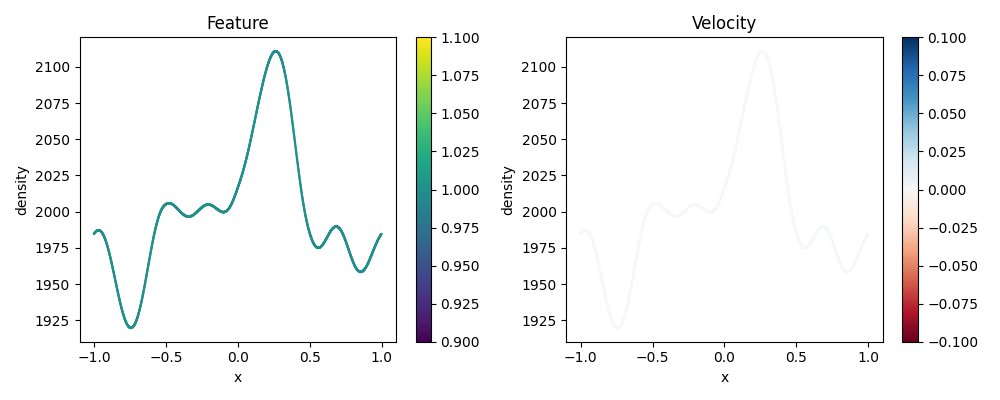

In [8]:
datasetPath = '../datasets/SFBC_dataset_I/dataset'
# datasetPath = '../datasets/SFBC_dataset_II/dataset/train'
# datasetPath = '../datasets/SFBC_dataset_III/dataset/train'
# datasetPath = '../datasets/SFBC_dataset_IV/dataset'
# datasetPath = '/home/winchenbach/dev/SFBC/datasets/test_case_IV/train/'
# datasetPath = '/home/winchenbach/dev/cuMath/examples/scripts/output/'

train_ds = datasetLoader(processFolder(hyperParameterDict, datasetPath))

plotState = getPreparePlotFunction(train_ds.fileFormat)(train_ds, hyperParameterDict)
updateFn = getUpdatePlotFunction(train_ds.fileFormat)

dropdown = widgets.Dropdown(options=train_ds.fileNames, description='File:', layout={'width': 'initial'})
slider = widgets.IntSlider(min=0, max=getFileCount(train_ds.fileNames[0]) + 1, value=0, description='Slider:')

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        slider.max = getFileCount(change['new']) + 1
        if slider.value > slider.max:
            slider.value = 0
        # print(change['new'], slider.value)
        updateFn(plotState, train_ds, hyperParameterDict, [change['new'], slider.value, None, None, None])

def on_change_slider(change):
    if change['type'] == 'change' and change['name'] == 'value':   
        # print(change['new'])
        updateFn(plotState, train_ds, hyperParameterDict, [dropdown.value, change['new'], None, None, None])

dropdown.observe(on_change)
slider.observe(on_change_slider)

display(dropdown)
display(slider)

In [19]:
import joblib
x = joblib.load('/home/winchenbach/Downloads/angles_plot.pkl')
print(x)

{'positions': array([[12.726098 , 11.575484 ],
       [ 7.519691 , 12.636872 ],
       [ 8.686985 , 15.439199 ],
       ...,
       [10.5541935, 18.869284 ],
       [ 2.921523 ,  2.283058 ],
       [33.073174 , 25.705975 ]], dtype=float32), 'angle': array([ 0.6622861 , -0.75359833,  1.072646  , ..., -0.6259439 ,
       -0.11198423, -0.14068624], dtype=float32), 'triang': <matplotlib.tri._triangulation.Triangulation object at 0x7eb5fbff1a90>}


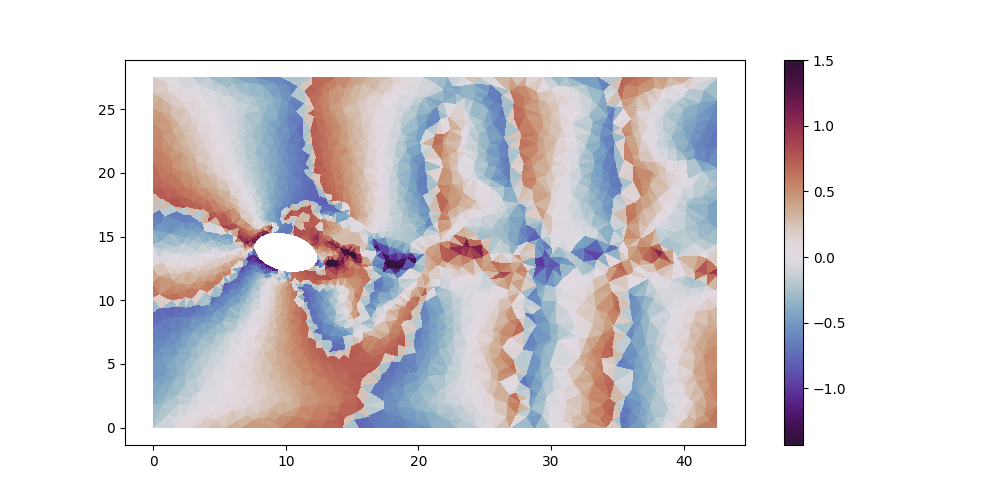

In [116]:
fig, axis = plt.subplots(1, 1, figsize=(10, 5), squeeze=False)

positions = x['positions']
angles = x['angle']
triangulation = x['triang']

sc = axis[0,0].tripcolor(triangulation, angles, shading='flat', cmap = 'twilight_shifted')
fig.colorbar(sc, ax=axis[0,0])

Original points: 2471, Edge points: 14535, Triangle points: 4845
(21851, 2)
Building Triangulation
Done with
29070
29070
29070
144


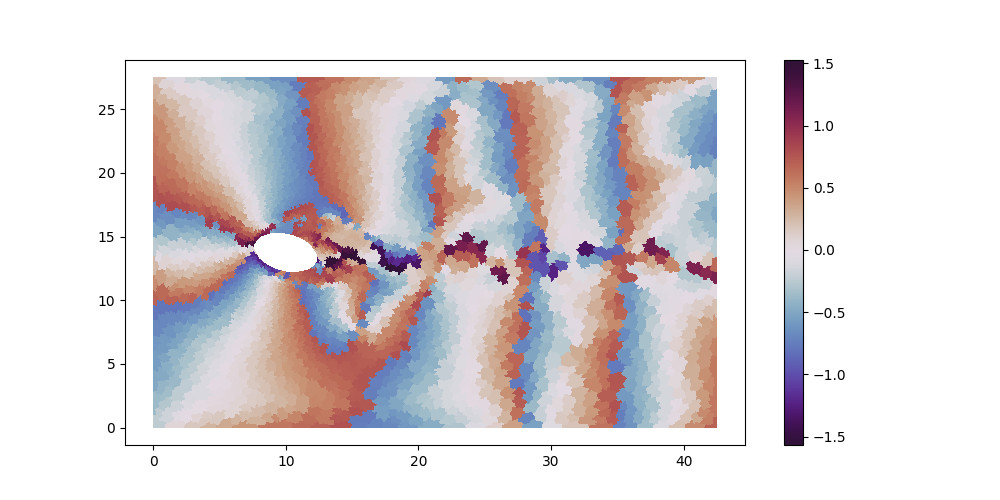

In [117]:
import copy
scalar = copy.deepcopy(angles)  
triangulation2 = copy.deepcopy(triangulation)

edge_centers_01 = (positions[triangulation2.triangles[:, 0]] + positions[triangulation2.triangles[:, 1]]) / 2
edge_centers_12 = (positions[triangulation2.triangles[:, 1]] + positions[triangulation2.triangles[:, 2]]) / 2
edge_centers_20 = (positions[triangulation2.triangles[:, 2]] + positions[triangulation2.triangles[:, 0]]) / 2

edges = edge_centers_01.shape[0]

triangle_centers = (positions[triangulation2.triangles[:, 0]] + positions[triangulation2.triangles[:, 1]] + positions[triangulation2.triangles[:, 2]]) / 3

original_points = positions.shape[0]
edge_points = edge_centers_01.shape[0] + edge_centers_12.shape[0] + edge_centers_20.shape[0]
triangle_points = triangle_centers.shape[0]
print(f"Original points: {original_points}, Edge points: {edge_points}, Triangle points: {triangle_points}")

combined_points = np.concatenate((positions, edge_centers_01, edge_centers_12, edge_centers_20, triangle_centers), axis=0)

print(combined_points.shape)

new_triangles = []
masks = []
colors = []
print('Building Triangulation')
for i in range(triangulation2.triangles.shape[0]):
    # colors.append(-1)
    # new_triangles.append([triangulation2.triangles[i, 0], triangulation2.triangles[i, 1], triangulation2.triangles[i, 2]])

    colors.append(scalar[triangulation2.triangles[i, 0]])
    # colors.append(1)
    new_triangles.append([triangulation2.triangles[i, 0], original_points + 3*edges + i, original_points + 0 * edges + i])
    
    # colors.append(2)
    colors.append(scalar[triangulation2.triangles[i, 1]])
    new_triangles.append([triangulation2.triangles[i, 1], original_points + 0 * edges + i, original_points + 3*edges + i])
    
    colors.append(scalar[triangulation2.triangles[i, 1]])
    # colors.append(3)
    new_triangles.append([triangulation2.triangles[i, 1], original_points + 1 * edges + i, original_points + 3*edges + i])
    
    colors.append(scalar[triangulation2.triangles[i, 2]])
    # colors.append(4)
    new_triangles.append([triangulation2.triangles[i, 2], original_points + 1 * edges + i, original_points + 3*edges + i])
    
    colors.append(scalar[triangulation2.triangles[i, 2]])
    # colors.append(5)
    new_triangles.append([triangulation2.triangles[i, 2], original_points + 2*edges + i, original_points + 3 * edges + i])
    
    colors.append(scalar[triangulation2.triangles[i, 0]])
    # colors.append(0)
    new_triangles.append([triangulation2.triangles[i, 0], original_points + 2 * edges + i, original_points + 3*edges + i])

    for ii in range(6):
        # if triangulation.mask[i] != False:
            # print('...')
        masks.append(triangulation.mask[i])

    # break

triangulation2.triangles = np.array(new_triangles)
triangulation2.mask = np.array(masks)
triangulation2.x = np.array(combined_points[:, 0])
triangulation2.y = np.array(combined_points[:, 1])

print('Done with')
print(len(new_triangles))
print(len(colors))
print(len(masks))
print(np.sum(triangulation2.mask))

fig, axis = plt.subplots(1, 1, figsize=(10, 5), squeeze=False)
sc = axis[0,0].tripcolor(triangulation2, colors, shading='flat', cmap = 'twilight_shifted')
fig.colorbar(sc, ax=axis[0,0])



In [ ]:

datasetPath = '/home/winchenbach/dev/diffSPH/partiBench/generator/export'
folder = processFolder(hyperParameterDict, datasetPath)
train_ds = datasetLoader(processFolder(hyperParameterDict, datasetPath))

In [ ]:
train_ds[0]

In [ ]:
fileNames = train_ds.fileNames
print(fileNames)

# for fileName in fileNames

In [ ]:
fileName, key, fileData, fileIndex, fileOffset = train_ds[0]
file = h5py.File(fileName, 'r')

In [ ]:
inFile = file

In [ ]:
device = hyperParameterDict['device']
dtype = torch.float32

In [ ]:
print(inFile['initial']['boundary'].keys())
inFile['simulationExport']['00001'].keys()

grp = inFile['simulationExport']['00001']
print(grp.keys())

In [ ]:
from BasisConvolution.util.testcases import computeSupport, parseSPHConfig

In [ ]:
inFile['config'].keys()

In [ ]:
inFile.attrs.keys()

In [ ]:
targetNeighbors = inFile.attrs['targetNeighbors']

staticFluidData = {
    'positions': torch.from_numpy(inFile['initial']['fluid']['positions'][:]).to(device = device, dtype = dtype),
    'velocities': torch.from_numpy(inFile['initial']['fluid']['velocities'][:]).to(device = device, dtype = dtype),
    'gravityAcceleration': torch.zeros_like(torch.from_numpy(inFile['initial']['fluid']['velocities'][:]).to(device = device, dtype = dtype)),
    'densities': torch.from_numpy(inFile['initial']['fluid']['densities'][:]).to(device = device, dtype = dtype),
    'areas': torch.from_numpy(inFile['initial']['fluid']['areas'][:]).to(device = device, dtype = dtype),
    'masses': torch.from_numpy(inFile['initial']['fluid']['masses'][:]).to(device = device, dtype = dtype),
    'supports': computeSupport(torch.from_numpy(inFile['initial']['fluid']['areas'][:]).to(device = device, dtype = dtype), targetNeighbors, 2),
    'indices': torch.from_numpy(inFile['initial']['fluid']['UID'][:]).to(device = device, dtype = torch.int32),
    'numParticles': len(inFile['initial']['fluid']['positions'][:]),                                  
}

config = parseSPHConfig(inFile, device, dtype)
area = inFile.attrs['radius'] **2 if 'area' not in inFile.attrs else inFile.attrs['area']
support = np.max(staticFluidData['supports'].detach().cpu().numpy()) if 'support' not in inFile.attrs else inFile.attrs['support']
if hyperParameterDict['numNeighbors'] > 0:
    support = computeSupport(area, hyperParameterDict['numNeighbors'], 2)
attributes = {
    'support': support,
    'targetNeighbors': inFile.attrs['targetNeighbors'],
    'restDensity': inFile.attrs['restDensity'],
    'dt': config['timestep']['dt'],
    'time': 0.0,
    'radius': inFile.attrs['radius'],
    'area': area,
}


In [ ]:
areas = torch.from_numpy(inFile['initial']['fluid']['areas'][:]).to(device = device, dtype = dtype)
print(areas)
computeSupport(areas, 45, 2)
hyperParameterDict['numNeighbors']
inFile.attrs['targetNeighbors']

In [ ]:
computeSupport(area, hyperParameterDict['numNeighbors'], 2)

In [ ]:
if 'boundaryInformation' in inFile:
    staticBoundaryData = {
            'indices': torch.arange(0, inFile['boundaryInformation']['boundaryPosition'].shape[0], device = device, dtype = torch.int64),
            'positions': torch.from_numpy(inFile['boundaryInformation']['boundaryPosition'][:]).to(device = device, dtype = dtype),
            'normals': torch.from_numpy(inFile['boundaryInformation']['boundaryNormals'][:]).to(device = device, dtype = dtype),
            'areas': torch.from_numpy(inFile['boundaryInformation']['boundaryArea'][:]).to(device = device, dtype = dtype),
            'masses': torch.from_numpy(inFile['boundaryInformation']['boundaryArea'][:]).to(device = device, dtype = dtype) * config['fluid']['rho0'],
            'velocities': torch.from_numpy(inFile['boundaryInformation']['boundaryVelocity'][:]).to(device = device, dtype = dtype),
            'densities': torch.from_numpy(inFile['boundaryInformation']['boundaryRestDensity'][:]).to(device = device, dtype = dtype),
            'supports': torch.from_numpy(inFile['boundaryInformation']['boundarySupport'][:]).to(device = device, dtype = dtype),
            'bodyIDs': torch.from_numpy(inFile['boundaryInformation']['boundaryBodyAssociation'][:]).to(device = device, dtype = torch.int64),
            'numParticles': len(inFile['boundaryInformation']['boundaryPosition'][:]),
        } if 'boundaryInformation' in inFile else None
elif 'initial' in inFile:
    staticBoundaryData = {
        'indices': torch.from_numpy(inFile['initial']['boundary']['UID'][:]).to(device = device, dtype = torch.int64),
        'positions': torch.from_numpy(inFile['initial']['boundary']['positions'][:]).to(device = device, dtype = dtype),
        'normals': torch.from_numpy(inFile['initial']['boundary']['normals'][:]).to(device = device, dtype = dtype),
        'distances': torch.from_numpy(inFile['initial']['boundary']['distances'][:]).to(device = device, dtype = dtype),
        'areas': torch.from_numpy(inFile['initial']['boundary']['areas'][:]).to(device = device, dtype = dtype),
        'masses': torch.from_numpy(inFile['initial']['boundary']['masses'][:]).to(device = device, dtype = dtype),
        'velocities': torch.from_numpy(inFile['initial']['boundary']['velocities'][:]).to(device = device, dtype = dtype),
        'densities': torch.from_numpy(inFile['initial']['boundary']['densities'][:]).to(device = device, dtype = dtype),
        'supports': computeSupport(torch.from_numpy(inFile['initial']['boundary']['areas'][:]).to(device = device, dtype = dtype), inFile.attrs['targetNeighbors'], 2),
        'bodyIDs': torch.from_numpy(inFile['initial']['boundary']['bodyIDs'][:]).to(device = device, dtype = torch.int64),
        'numParticles': len(inFile['initial']['boundary']['UID'][:]),

    } if 'boundary' in inFile['initial'] else None
else:
    staticBoundaryData = None
print(staticBoundaryData)

In [ ]:
inFile['simulationExport']['00001'].keys()

grp = inFile['simulationExport']['00001']

dynamicBoundaryData = {}
for k in staticBoundaryData.keys():
    if isinstance(staticBoundaryData[k], torch.Tensor):
        dynamicBoundaryData[k] = staticBoundaryData[k].clone()
    else:
        dynamicBoundaryData[k] = staticBoundaryData[k]

if 'boundaryDensity' in grp:
    dynamicBoundaryData['densities'] = torch.from_numpy(grp['boundaryDensity'][:]).to(device = device, dtype = dtype)
if 'boundaryVelocity' in grp:
    dynamicBoundaryData['velocities'] = torch.from_numpy(grp['boundaryVelocity'][:]).to(device = device, dtype = dtype)
if 'boundaryPosition' in grp:
    dynamicBoundaryData['positions'] = torch.from_numpy(grp['boundaryPosition'][:]).to(device = device, dtype = dtype)
if 'boundaryNormals' in grp:
    dynamicBoundaryData['normals'] = torch.from_numpy(grp['boundaryNormals'][:]).to(device = device, dtype = dtype)


In [ ]:
from BasisConvolution.util.dataloader import datasetLoader, loadAugmentedFrame

config, attributes, currentState, priorState, trajectoryStates = loadAugmentedFrame(0, train_ds, hyperParameterDict)

In [ ]:
# datasetPath = '../datasets/SFBC_dataset_I/dataset'
# datasetPath = '../datasets/SFBC_dataset_II/dataset/train'
# datasetPath = '../datasets/SFBC_dataset_III/dataset/train'
# datasetPath = '../datasets/SFBC_dataset_I/dataset'
datasetPath = '/home/winchenbach/dev/diffSPH/partiBench/generator/export'

train_ds = datasetLoader(processFolder(hyperParameterDict, datasetPath))

plotState = getPreparePlotFunction(train_ds.fileFormat)(train_ds, hyperParameterDict)
updateFn = getUpdatePlotFunction(train_ds.fileFormat)

dropdown = widgets.Dropdown(options=train_ds.fileNames, description='File:', layout={'width': 'initial'})
slider = widgets.IntSlider(min=0, max=getFileCount(train_ds.fileNames[0]), value=0, description='Slider:')

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        slider.max = getFileCount(change['new'])
        if slider.value > slider.max:
            slider.value = 0
        # print(change['new'], slider.value)
        updateFn(plotState, train_ds, hyperParameterDict, [change['new'], slider.value, None, None, None])

def on_change_slider(change):
    if change['type'] == 'change' and change['name'] == 'value':   
        # print(change['new'])
        updateFn(plotState, train_ds, hyperParameterDict, [dropdown.value, change['new'], None, None, None])

dropdown.observe(on_change)
slider.observe(on_change_slider)

display(dropdown)
display(slider)